## Question 1: Reading in an image (2pt)

Included in this .zip file is an image file `obama.jpg`.  Help fill in a function to read and display the image.

Use the `imageio` package.  Their API might help if you need it: https://pypi.org/project/imageio/

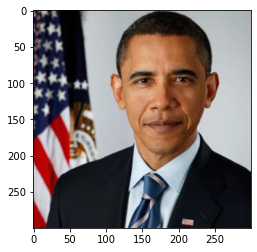

In [2]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

def read_in_image(path_to_image):

    img = imageio.imread(path_to_image)
   
    return img

img = read_in_image('obama.jpg')
if img is None:
    plt.text(0.25,0.5,'No Image to Show.',fontsize='xx-large')
else:

#---------CODE-HERE---------

# Using plt, show the img.  Overwite the `pass`

    plt.imshow(img)

#---------------------------

## Question 2a: Eye Detection (1pt)

Create a function that can take in a RGB image (width X height X 3) and detect the eyes (if any) on that image.  Then overlay what you find on the original image.  We will provide the overlay function.  Your job will be to create the eye detection part, where we take the RGB image and return a 2D image (width X height) with eye probability values.  Each pixel should represent the probability of finding an eye, where 0 means 0% chance of there being an eye at that location and 1 means 100% chance of there being an eye at that pixel.

### Answer: 

In order to solve the proposed task, the face and eyes classifiers (haar cascades) that come with the OpenCV library has been used. Their download has been performed from their official github repository: 
- for the face https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml; 
- for the eyes https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml.
The .xml files are provided in the working directory. 

In [3]:
# ---------CODE-HERE---------

def read_in_image(path_to_image):
    img= cv2.imread('obama.jpg')
    return img

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

# Eyes detection considering that eyes are always in the top half of your face frame and determination 
# of what side an eye belongs to using coordinate analysis
def detect_eyes(img, classifier):
    gray_frame = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray_frame, 1.3, 5) 
    width = np.size(img, 1) 
    height = np.size(img, 0) 
    left_eye = None
    right_eye = None
    for (x, y, w, h) in eyes:
        if y > height / 2:
            pass
        eyecenter = x + w / 2  
        if eyecenter < width * 0.5:
            left_eye = img[y:y + h, x:x + w]
        else:
            right_eye = img[y:y + h, x:x + w]
    return left_eye, right_eye

# Face detection and false positive reduction filtering with respect to the biggest detected face frame
def detect_faces(img, classifier):
    gray_frame = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    coords = face_cascade.detectMultiScale(gray_frame, 1.3, 5)
    if len(coords) > 1:
        biggest = (0, 0, 0, 0)
        for i in coords:
            if i[3] > biggest[3]:
                biggest = i
        biggest = np.array([i], np.int32)
    elif len(coords) == 1:
        biggest = coords
    else:
        return None
    for (x, y, w, h) in biggest:
        frame = img[y:y + h, x:x + w]
    return frame

# Eye images processing to achieve a binary mask for each eye
def blob_process(img):
    gray_frame = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imshow('gray', img)
    cv2.waitKey(0)
    _, img = cv2.threshold(gray_frame, 47, 255, cv2.THRESH_BINARY)
    cv2.imshow('eyes', img)
    cv2.waitKey(0)
    return img

# Eyebrows cutting function from the eye frame, considering that eyebrows always take ~25% of the image starting from the top
def cut_eyebrows(img):
    height, width = img.shape[:2]
    eyebrow_h = int(height / 2.5)
    img = img[eyebrow_h:height, 0:width]  
    return img

# Overlay function proposed 
def overlay_eyes(img, eyes):
    img = img.astype(np.float32)
    img *= 0.75
    img[:, :, 0]+= eyes*64
    img = np.clip(img, 0, 255)
    img = img.astype(np.uint8)
    return img

In [4]:
img= read_in_image('obama.jpg')

if img is None:
    plt.text(0.25,0.5,'No Image to Show.',fontsize='xx-large')
else:
    face_frame = detect_faces(img, face_cascade)
    if face_frame is not None:
        eyes = detect_eyes(face_frame, eye_cascade)
        for eye in eyes:
            if eye is not None:
                eye = cut_eyebrows(eye)
                eyes_bin = blob_process(eye)
                
                cv2.imshow('eyes', overlay_eyes(eye, (255-eyes_bin))) # (255-eyes_bin): Complement of the binary mask to let the eye pixels (pupil and eyelid) to be 1
                cv2.waitKey(0)

 #---------------------------

## Question 2b: 
For full credit, feel free to just generate a random overlay with a random number generator (such as `np.random.rand`).  

### Answer:

In [5]:
# ---------CODE-HERE---------

from numpy.random import seed
from numpy.random import rand

seed(1)
random_matrix = np.random.rand(3, 3)
print (random_matrix)

#---------------------------

[[4.17022005e-01 7.20324493e-01 1.14374817e-04]
 [3.02332573e-01 1.46755891e-01 9.23385948e-02]
 [1.86260211e-01 3.45560727e-01 3.96767474e-01]]
